In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_csv(r"C:\Users\Nandita\Downloads\test dataset\Drug_Data.csv")

In [10]:
df

,drugName,Prescribed_for,Drug_Review,User_Rating,Date,Count_of_Reviews
0,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,05-Mar-17,35
4,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4
...,...,...,...,...,...,...
53761,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43
53762,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,08-Oct-16,11
53763,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7
53764,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20


In [11]:
df.shape

(53766, 6)

In [12]:
df.isnull().sum()

drugName              0
Prescribed_for      295
Drug_Review           0
User_Rating           0
Date                  0
Count_of_Reviews      0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53766 entries, 0 to 53765
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   drugName          53766 non-null  object
 1   Prescribed_for    53471 non-null  object
 2   Drug_Review       53766 non-null  object
 3   User_Rating       53766 non-null  int64 
 4   Date              53766 non-null  object
 5   Count_of_Reviews  53766 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 2.5+ MB


In [14]:
df.nunique()

drugName             2637
Prescribed_for        708
Drug_Review         48280
User_Rating            10
Date                 3566
Count_of_Reviews      325
dtype: int64

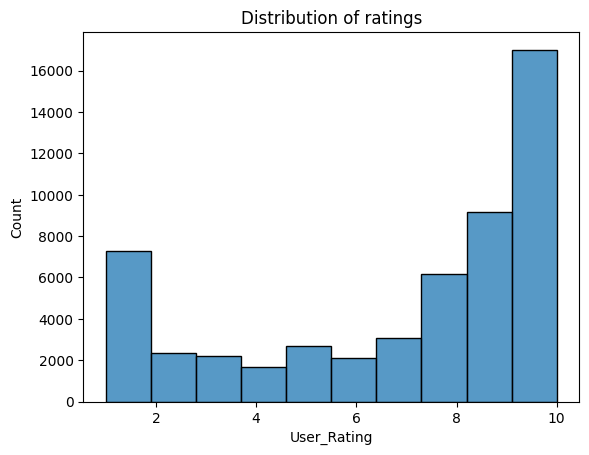

In [15]:
sns.histplot(data=df,x='User_Rating',bins=10)
plt.title('Distribution of ratings')
plt.show()

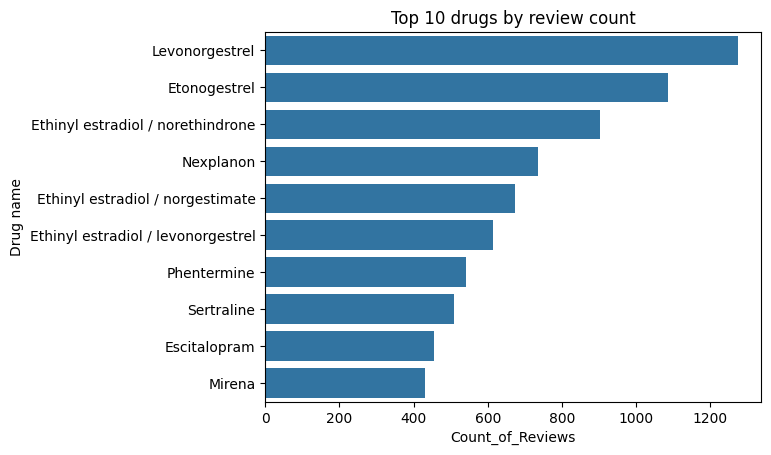

In [16]:
top_drugs=df['drugName'].value_counts().head(10)
sns.barplot(x=top_drugs.values,y=top_drugs.index)
plt.xlabel('Count_of_Reviews')
plt.ylabel('Drug name')
plt.title('Top 10 drugs by review count')
plt.show()

In [17]:
top_drugs

drugName
Levonorgestrel                        1273
Etonogestrel                          1085
Ethinyl estradiol / norethindrone      903
Nexplanon                              736
Ethinyl estradiol / norgestimate       673
Ethinyl estradiol / levonorgestrel     615
Phentermine                            542
Sertraline                             508
Escitalopram                           455
Mirena                                 431
Name: count, dtype: int64

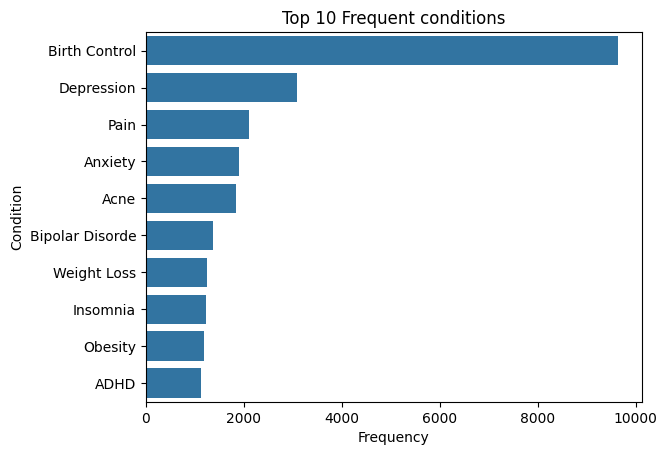

In [21]:
top_conditions=df['Prescribed_for'].value_counts().head(10)
sns.barplot(x=top_conditions.values,y=top_conditions.index)
plt.title('Top 10 Frequent conditions')
plt.xlabel('Frequency')
plt.ylabel('Condition')
plt.show()

In [22]:
top_conditions

Prescribed_for
Birth Control      9648
Depression         3095
Pain               2100
Anxiety            1908
Acne               1847
Bipolar Disorde    1380
Weight Loss        1248
Insomnia           1231
Obesity            1189
ADHD               1126
Name: count, dtype: int64

In [26]:
def get_medications_for_condition(Prescribed_for):
    medications = df[df['Prescribed_for'] == Prescribed_for]['drugName'].unique()#.head(5)
    print(medications)

In [27]:
get_medications_for_condition('Pain')

['Duloxetine' 'Ultram' 'Acetaminophen / hydrocodone' 'Oxycodone'
 'Tramadol' 'Tylenol with Codeine #3' 'Demerol' 'Nalbuphine' 'Gabapentin'
 'Buprenex' 'Fentanyl' 'Percocet' 'OxyContin' 'Flector Patch' 'Avinza'
 'Oxymorphone' 'Pramoxine' 'Toradol' 'Ketorolac' 'Norco' 'Diclofenac'
 'Opana' 'Meperidine' 'Hysingla ER' 'Tylenol' 'Amitriptyline'
 'Acetaminophen / oxycodone' 'Fentanyl Transdermal System' 'Zipsor'
 'Vicodin' 'Methadone' 'Nucynta ER' 'Zohydro ER' 'Lidocaine' 'Tapentadol'
 'Nortriptyline' 'Dilaudid' 'Motrin IB' 'Hydromorphone' 'Talwin Nx'
 'Hydroxyzine' 'Butrans' 'Naproxen' 'Imipramine' 'Panlor DC' 'Endocet'
 'Opana ER' 'Roxicodone' 'Etodolac' 'Advil' 'Oramorph SR' 'Lortab'
 'Fiorinal' 'Indomethacin' 'Nubain' 'Buprenorphine' 'Methadose'
 'Ultram ER' 'Nucynta' 'Pregabalin' 'Elavil' 'Toradol IV / IM' 'Lyrica'
 'Acetaminophen / codeine' 'Acetaminophen / caffeine / dihydrocodeine'
 'Acetaminophen / propoxyphene' 'Neurontin' 'Celecoxib' 'Naprosyn'
 'Hydrocodone / ibuprofen' 'Morphine

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df = df[['drugName', 'Prescribed_for']]

df.dropna(subset=['Prescribed_for'], inplace=True)


tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Prescribed_for'])


user_condition = input("Enter your health condition: ")


user_condition_tfidf = tfidf_vectorizer.transform([user_condition])


similarity_scores = cosine_similarity(user_condition_tfidf, tfidf_matrix)


top_indices = similarity_scores.argsort()[0][::-1]

top_medicines = df['drugName'].iloc[top_indices]

print("Top recommended medicines for", user_condition, ":")
for medicine in top_medicines:
    print(medicine)

Enter your health condition:  joint pain


Top recommended medicines for joint pain :
Ceftriaxone
Cyclobenzaprine
Diazepam
Piroxicam
Piroxicam
Clonazepam
Cyclobenzaprine
Cyclobenzaprine
Cyclobenzaprine
Cyclobenzaprine
Diazepam
Percocet
OxyContin
Nalbuphine
Toradol
Acetaminophen / codeine
Cymbalta
Flector Patch
Vicodin
Acetaminophen / hydrocodone
Oxymorphone
Tapentadol
Tramadol
Ketorolac
Ultram
Exalgo
Acetaminophen / oxycodone
Hydromorphone
Tramadol
Dilaudid
Acetaminophen / oxycodone
Cymbalta
Methadone
Dilaudid
Gabapentin
Neurontin
Percocet
Acetaminophen / hydrocodone
Hysingla ER
Tylenol with Codeine #3
Nucynta
Dilaudid-HP
Diclofenac
Oxycodone
Tramadol
Percocet
Amitriptyline
Tramadol
Tapentadol
Fentanyl
Acetaminophen / oxycodone
Fentanyl
Trilisate
Voltaren Gel
Cymbalta
Hydromorphone
Cymbalta
Oxymorphone
Flector Patch
Percocet
Magnacet
Motrin IB
Acetaminophen / hydrocodone
Acetaminophen / hydrocodone
Percocet
Ketorolac
Lidocaine
OxyContin
Acetaminophen / hydrocodone
Avinza
Acetaminophen / oxycodone
Gabapentin
Tapentadol
Lyrica
Tr

In [36]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df = df[['drugName', 'Prescribed_for']]

df.dropna(subset=['Prescribed_for'], inplace=True)


tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Prescribed_for'])


user_condition = input("Enter your health condition: ")


user_condition_tfidf = tfidf_vectorizer.transform([user_condition])


similarity_scores = cosine_similarity(user_condition_tfidf, tfidf_matrix)


top_indices = similarity_scores.argsort()[0][::-1][:10]  # Select top 10 indices

top_medicines = df['drugName'].iloc[top_indices]

print("Top 10 recommended medicines for", user_condition, ":")
for medicine in top_medicines:
    print(medicine)

Enter your health condition:  nausea


Top 10 recommended medicines for nausea :
Zofran ODT
Promethazine
Zofran
Phenergan
Prochlorperazine
Ondansetron
Scopolamine
Ondansetron
Ondansetron
Ondansetron
